In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [3]:
input_filename = "./AzureFunctionsInvocationTraceForTwoWeeksJan2021.txt"
app_func_ids = defaultdict(set)
app_arrivals = defaultdict(list)
app_durations = defaultdict(list)
with open(input_filename, "r") as f:
    csvreader = csv.DictReader(f, delimiter=",")
    for line in csvreader:
        app_func_ids[line["app"]].add(line["func"])
        app_arrivals[line["app"]].append(float(line["end_timestamp"]) - float(line["duration"]))
        app_durations[line["app"]].append(float(line["duration"]))


There are 119 apps in total
There are 424 functions in total
Each app has at most 29 functions, at least 1 functions, on average 3.563025210084034 functions


(0.0, 60.0)

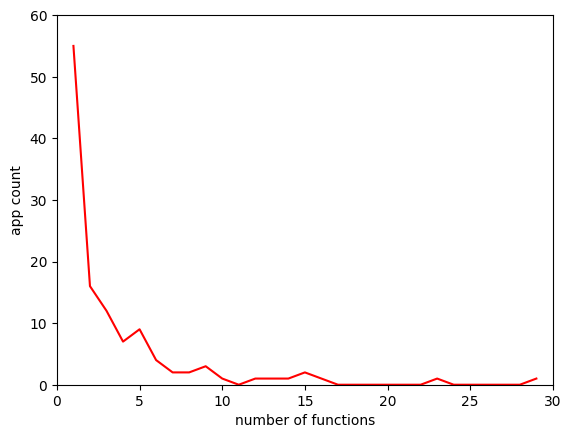

In [12]:
app_total = len(app_func_ids)
func_num = [len(app_func_ids[app]) for app in app_func_ids]
func_total, func_max, func_min = sum(func_num), max(func_num), min(func_num)
print(f"There are {app_total} apps in total")
print(f"There are {func_total} functions in total")
print(f"Each app has at most {func_max} functions, at least {func_min} functions, on average {func_total / app_total} functions")
count, bins_count = np.histogram(func_num, bins=range(func_min, func_max + 2))
plt.plot(bins_count[:-1], count, color="red", label="PDF")
plt.xlabel("number of functions")
plt.ylabel("app count")
plt.xlim(0, 30)
plt.ylim(0, 60)

In [13]:
request_spans = [max(app_arrivals[app]) - min(app_arrivals[app]) for app in app_arrivals]
print(f"Average span: {sum(request_spans) / len(request_spans)}")
print(f"Max span: {max(request_spans)}")
print(f"Min span: {min(request_spans)}")

Average span: 651885.8917116998
Max span: 1209420.002765894
Min span: 0.0


Each app has at most 535667 requests, at least 1 requests, on average 16646.647058823528 requests


(0.0, 100.0)

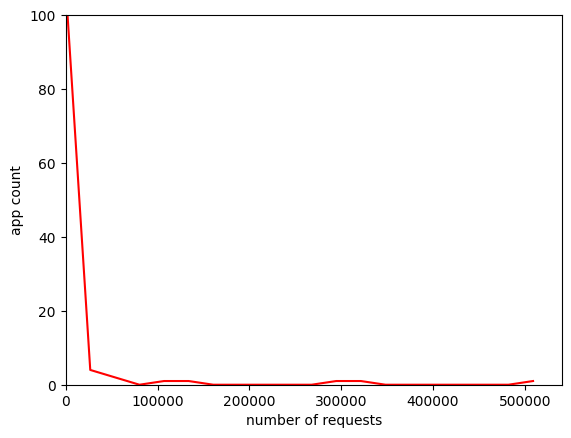

In [33]:
request_num = [len(app_arrivals[app]) for app in app_arrivals]
request_total, request_max, request_min = sum(request_num), max(request_num), min(request_num)
print(f"Each app has at most {request_max} requests, at least {request_min} requests, on average {request_total / len(request_num)} requests")
app_count, req_counts = np.histogram(request_num, bins=20)
plt.plot(req_counts[:-1], app_count, color="red", label="PDF")
plt.xlabel("number of requests")
plt.ylabel("app count")
plt.xlim(0, 540000)
plt.ylim(0, 100)

In [32]:
from pprint import pprint
pprint(sorted(request_num))

[1,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 7,
 9,
 14,
 14,
 16,
 19,
 22,
 26,
 28,
 30,
 31,
 35,
 38,
 39,
 44,
 49,
 50,
 76,
 78,
 79,
 89,
 98,
 104,
 114,
 130,
 143,
 143,
 219,
 235,
 237,
 245,
 257,
 266,
 317,
 332,
 339,
 341,
 343,
 375,
 415,
 427,
 457,
 571,
 667,
 667,
 724,
 768,
 836,
 893,
 926,
 1005,
 1174,
 1377,
 1573,
 1687,
 1812,
 1851,
 2115,
 2308,
 2844,
 3326,
 3415,
 3461,
 4027,
 4067,
 4706,
 5174,
 5402,
 5439,
 5500,
 6005,
 6723,
 7244,
 7918,
 7935,
 9050,
 9145,
 9615,
 10219,
 10268,
 12240,
 12672,
 12966,
 14669,
 15260,
 19920,
 20156,
 25413,
 27294,
 31100,
 31260,
 34713,
 59798,
 71837,
 124927,
 143521,
 299817,
 328885,
 535667]


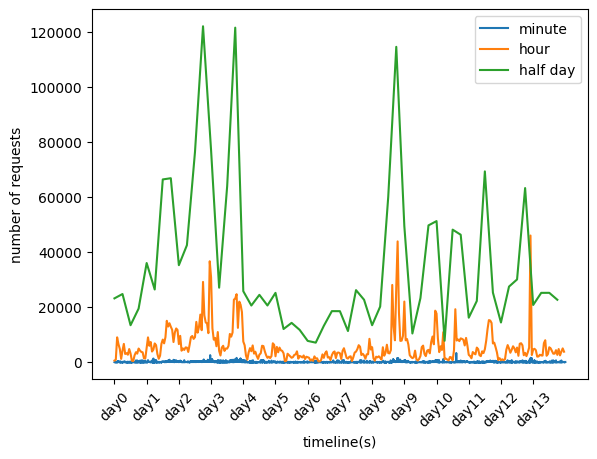

In [43]:
from functools import reduce
total_arrivals = list(sorted(reduce(lambda x, y: x + y, app_arrivals.values())))
arrival_count_m, timeline_m = np.histogram(total_arrivals, bins=20160)
arrival_count_h, timeline_h = np.histogram(total_arrivals, bins=336)
arrival_count_6h, timeline_6h = np.histogram(total_arrivals, bins=56)
plt.plot(timeline_m[:-1], arrival_count_m, label="minute")
plt.plot(timeline_h[:-1], arrival_count_h, label="hour")
plt.plot(timeline_6h[:-1], arrival_count_6h, label="half day")
plt.xticks(np.arange(0, 336, 24)*3600, [f"day{i}" for i in range(14)], rotation=45)
plt.xlabel("timeline(s)")
plt.ylabel("number of requests")
plt.legend()

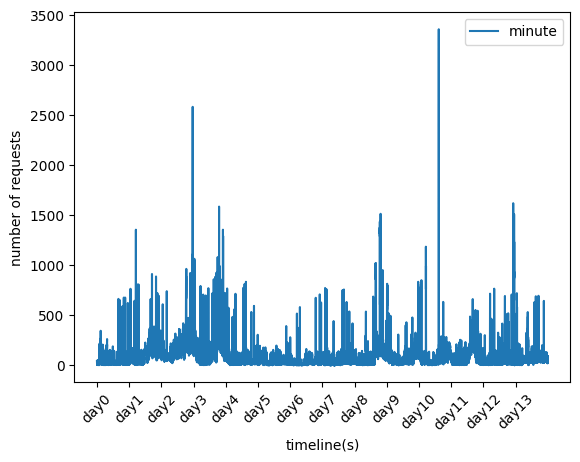

In [44]:
plt.plot(timeline_m[:-1], arrival_count_m, label="minute")
plt.xticks(np.arange(0, 336, 24)*3600, [f"day{i}" for i in range(14)], rotation=45)
plt.xlabel("timeline(s)")
plt.ylabel("number of requests")
plt.legend()

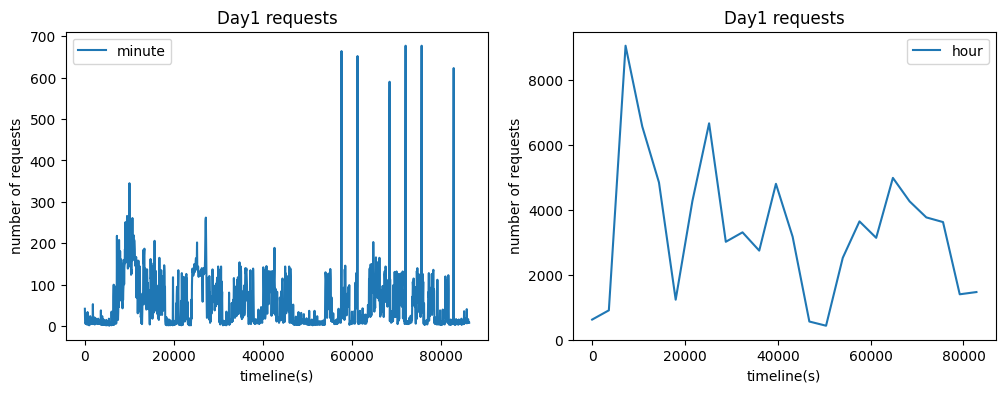

In [56]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Day1 requests")
plt.plot(timeline_m[:60*24], arrival_count_m[:60*24], label="minute")
plt.xlabel("timeline(s)")
plt.ylabel("number of requests")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Day1 requests")
plt.plot(timeline_h[:24], arrival_count_h[:24], label="hour")
plt.xlabel("timeline(s)")
plt.ylabel("number of requests")
plt.legend()

In [66]:
# filter out apps with less than 100 requests
filtered_app_arrivals = sorted([app_arrivals[app] for app in app_arrivals if len(app_arrivals[app]) > 100], key=lambda x: len(x))
# discrete the app_id
app_arrivals = {i : arrival for i, arrival in enumerate(filtered_app_arrivals)}

In [69]:
print("There are {} apps with more than 100 requests".format(len(app_arrivals)))
for i in range(len(app_arrivals) - 1):
    assert(len(app_arrivals[i]) <= len(app_arrivals[i + 1]))

There are 77 apps with more than 100 requests


In [95]:
def analyse_app(app_id):
    print("============================================")
    print("Statistics for app {}".format(app_id))
    arrivals = app_arrivals[app_id]
    arrivals.sort()
    arrivals = np.array(arrivals)
    print(f"Total number of requests: {len(arrivals)}")
    print(f"Timeline start: {arrivals[0]:.3f}s, end: {arrivals[-1]:.3f}s, duration: {arrivals[-1] - arrivals[0]:.3f}s")
    diffs = arrivals[1:] - arrivals[:-1]
    print(f"Arrival interval max: {max(diffs):.3f}s, min: {min(diffs)}s, average: {sum(diffs) / len(diffs):.3f}s, median: {np.median(diffs):.3f}s")
    bursty_num = sum(diffs[diffs < 1])
    print(f"There are {bursty_num} ({bursty_num / len(diffs) * 100:.3f}%) requests are bursty ")


In [97]:
for i in range(len(app_arrivals)):
    analyse_app(i)

Statistics for app 0
Total number of requests: 104
Timeline start: 842386.319s, end: 843770.670s, duration: 1384.351s
Arrival interval max: 544.039s, min: 0.0s, average: 13.440s, median: 2.598s
There are 4.173036935389973 (4.051%) requests are bursty 
Statistics for app 1
Total number of requests: 114
Timeline start: 773956.196s, end: 775148.976s, duration: 1192.779s
Arrival interval max: 409.436s, min: 0.0s, average: 10.556s, median: 0.296s
There are 9.606973560294136 (8.502%) requests are bursty 
Statistics for app 2
Total number of requests: 130
Timeline start: 24609.660s, end: 25230.696s, duration: 621.036s
Arrival interval max: 112.264s, min: 4.913330485578626e-06s, average: 4.814s, median: 0.828s
There are 14.91091879081796 (11.559%) requests are bursty 
Statistics for app 3
Total number of requests: 143
Timeline start: 45783.747s, end: 1205882.410s, duration: 1160098.663s
Arrival interval max: 314999.429s, min: 95.37397503852844s, average: 8169.709s, median: 900.412s
There are 0

In [99]:
# convert the filtered app_arrivals to the simulator-compatible workload format
output_filename = "./azuretrace.csv"
with open(output_filename, 'w', newline='') as workload_file:
    writer = csv.writer(workload_file)
    # metadata
    writer.writerow([len(app_arrivals), 14*24*3600, "azure_function_trace_with_over_100_reqs"])
    id_time_pairs = sorted([(app_id, arrival) for app_id in app_arrivals for arrival in app_arrivals[app_id]], key=lambda x: x[1])
    # request model id, arrival timestamp
    for model_id, arrive_time in id_time_pairs:
        writer.writerow([model_id, arrive_time])